In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets,cross_validation,ensemble

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def load_data_classification():
    '''
    加载用于分类问题的数据集
    : return:一个元祖   用于分类问题 元祖元素依次为：训练样本集 测试样本集 训练样本集对应的标记  测试样本集对应的标记
    '''
    digits=datasets.load_digits()   #手写数字 数据集
    return cross_validation.train_test_split(digits.data,digits.target,test_size=0.25,random_state=0,stratify=digits.target)

In [3]:
def test_AdaBoostClassifier(*data):
    '''
    测试  AdaBoostClassifier 的用法 绘制  AdaBoostClassifier 的预测性能随基础的分类器 *数量*的影响
    
    ：param data  可变参数 它是一个元祖，这里要求其元素依次为：训练样本集 测试样本集 训练样本的标记  测试样本的标记
    ：return None
    '''
    X_train,X_test,y_train,y_test=data
    clf=ensemble.AdaBoostClassifier(learning_rate=0.1)  #  learning_rate:控制生成的基学习器的数量  0-1 取值越小  生成的基学习器数量越多
    clf.fit(X_train,y_train)
    #绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    estimators_num=len(clf.estimators_)  #学习器的数量  默认 50
    X=range(1,estimators_num+1)
    ax.plot( list(X),list(clf.staged_score(X_train,y_train)),label='Traing score')
    ax.plot( list(X),list(clf.staged_score(X_test,y_test)),label='Testing score')
    ax.set_xlabel('estimator num')
    ax.set_ylabel('score')
    ax.legend(loc='best')
    ax.set_title('AdaBoostClassifier')
    plt.show()
    

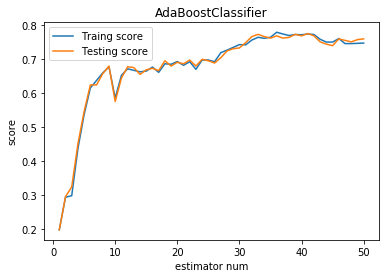

In [4]:
X_train,X_test,y_train,y_test=load_data_classification()
test_AdaBoostClassifier(X_train,X_test,y_train,y_test)

#随着算法的推进每一轮迭代产生一个新的个体分类器被集成 此时集成分类器的训练和误差都在下降  当个体分类器数量到达一定值时 集成分类器数量预测
# 准确率在一定范围内波动

#  这证明：集成学习能很好地抵消拟合

In [5]:
#当将 algorithm改为SAMME后 再测试一下
def test_AdaBoostClassifier_learning_rate(*data):
    '''
    测试  AdaBoostClassifier 的预测性能随学习率的影响   algorithm改为SAMME后
    
    ：param data  可变参数 它是一个元祖，这里要求其元素依次为：训练样本集 测试样本集 训练样本的标记  测试样本的标记
    ：return None
    
    '''
    X_train,X_test,y_train,y_test=data
    learning_rates=np.linspace(0.01,1)
    #绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    traing_scores=[]
    testing_scores=[]
    for learning_rate in learning_rates:
        clf=ensemble.AdaBoostClassifier(learning_rate=learning_rate,n_estimators=500,algorithm='SAMME') 
        clf.fit(X_train,y_train)
        traing_scores.append(clf.score(X_train,y_train) )
        testing_scores.append(clf.score(X_test,y_test) )
    ax.plot(learning_rates,traing_scores,label='Traing score')
    ax.plot(learning_rates,testing_scores,label='Testing score')
    ax.set_xlabel('learning_rates')
    ax.set_ylabel('score')
    ax.legend(loc='best')
    ax.set_title('AdaBoostClassifier')
    plt.show()
    

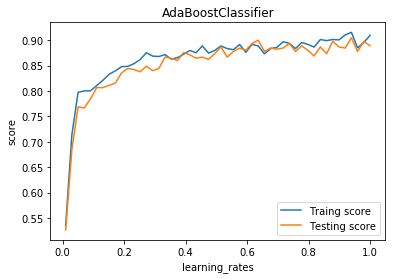

'\n采用了 SAMME 算法时 测试准确率和训练准确率确实随着学习率先上升后稳定的  因为当学习率小时 理论上需要更多数量的弱学习器\n但这里固定了弱学习器的数量为 500 相当于低水平的学习率来讲 数量不够 随着学习的上升\n达到良好的性能所需要的学习器数量需求也在下降\n'

In [6]:
test_AdaBoostClassifier_learning_rate(X_train,X_test,y_train,y_test)
'''
采用了 SAMME 算法时 测试准确率和训练准确率确实随着学习率先上升后稳定的  因为当学习率小时 理论上需要更多数量的弱学习器
但这里固定了弱学习器的数量为 500 相当于低水平的学习率来讲 数量不够 随着学习的上升
达到良好的性能所需要的学习器数量需求也在下降
'''

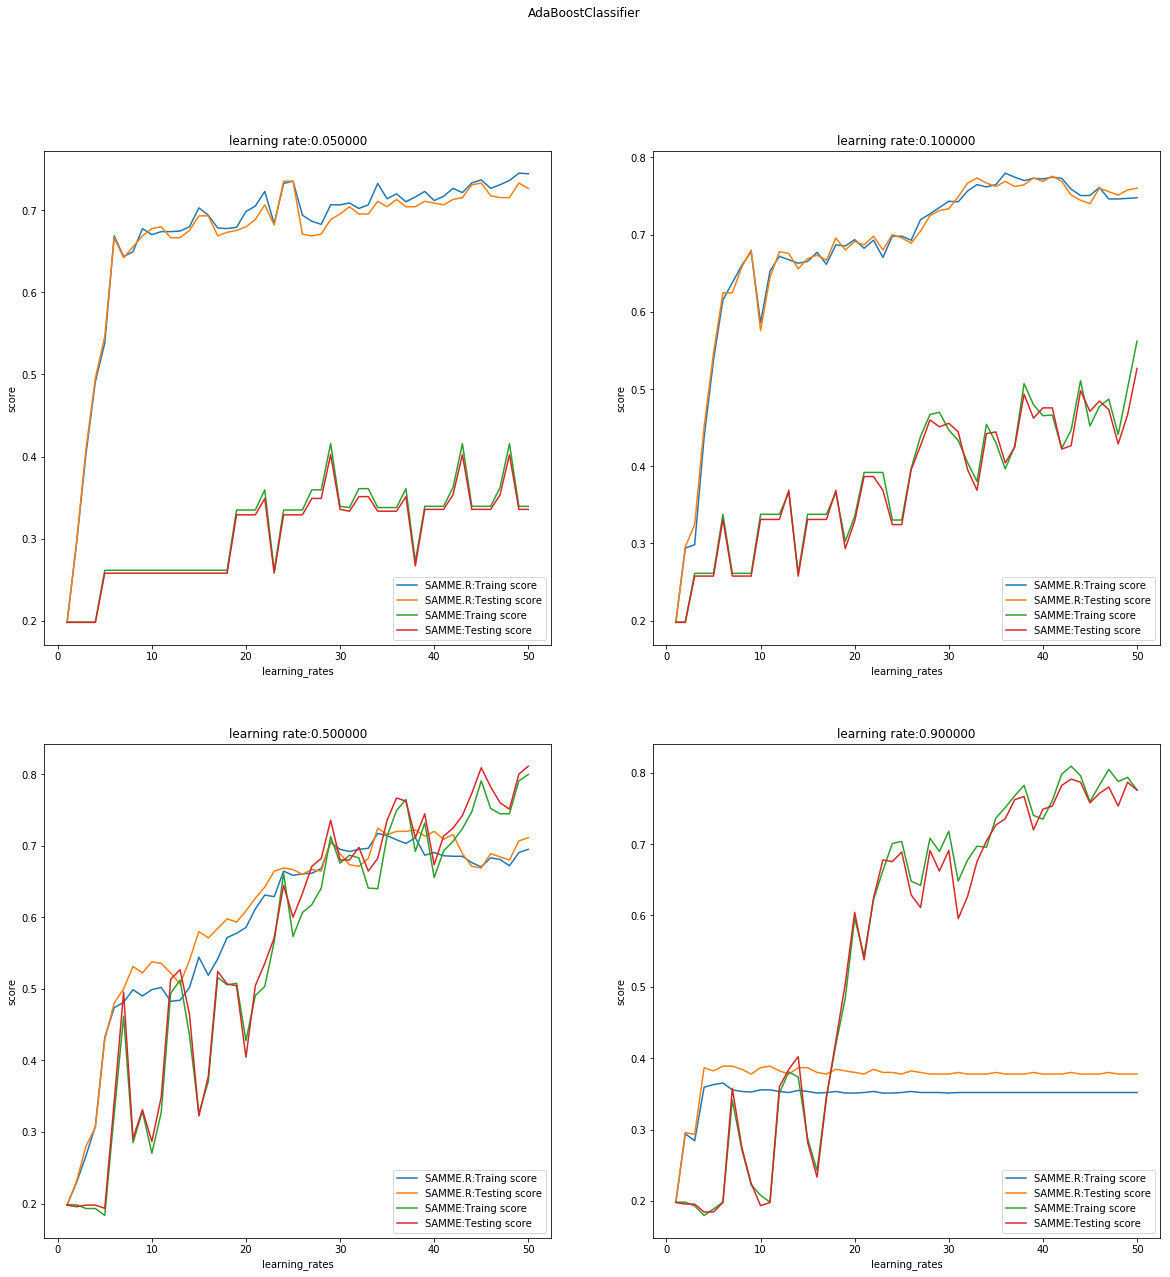

In [8]:
def test_AdaBoostClassifier_algorithm(*data):
    '''
    测试  AdaBoostClassifier 的预测性能随学习率    algorithm 的影响   
    ：param data  可变参数 它是一个元祖，这里要求其元素依次为：训练样本集 测试样本集 训练样本的标记  测试样本的标记
    ：return None
    '''
    X_train,X_test,y_train,y_test=data
    algorithms=['SAMME.R','SAMME']
    fig=plt.figure(figsize=(20,20))
    learning_rates=[0.05,0.1,0.5,0.9]
    for i,learning_rate in enumerate(learning_rates):
        ax=fig.add_subplot(2,2,i+1)
        for i , algorithm in enumerate(algorithms):
            clf=ensemble.AdaBoostClassifier(learning_rate=learning_rate,algorithm=algorithm)
            clf.fit(X_train,y_train)
            
            estimators_num=len(clf.estimators_)
            X=range(1,estimators_num+1)
            ax.plot( list(X),list(clf.staged_score(X_train,y_train)),label='%s:Traing score'%algorithms[i])
            ax.plot( list(X),list(clf.staged_score(X_test,y_test)),label='%s:Testing score'%algorithms[i])
        ax.set_xlabel('learning_rates')
        ax.set_ylabel('score')
        ax.legend(loc='lower right')
        ax.set_title('learning rate:%f'%learning_rate)
    fig.suptitle('AdaBoostClassifier')
    plt.show()
'''
分析 当学习率降小时 SAMME.R算法总是预测性能较好但学习率大时 SAMME.R算法在个体分类器数量较小
时预测性能较好，打个体决策树数量较多时预测性较差  这是因为 SAMME.R算法在个体分类器数量
饱和状态下的性能在学习率较大时会迅速下降
'''
test_AdaBoostClassifier_algorithm(X_train,X_test,y_train,y_test)